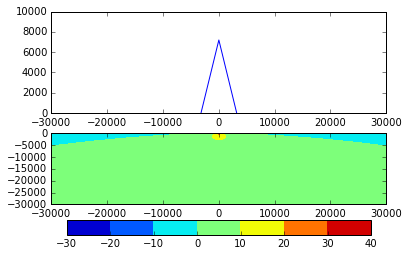

In [1]:
%pylab inline
import matplotlib.pyplot as plt
from ipywidgets import interact
import ipywidgets as widgets

nx = 51
nz = 50
h = 5
w = 8
G = np.zeros((nz,nx))

rho = 2600 #kg/m3
g = 9.8 #m/s2
Y = 100e6

xx = np.linspace(-30000,30000,nx)
zz = np.linspace(.1,30000,nz)
        
def plt_update(height,width,shape):
    if shape=='tri':
        h = (1 - abs(xx)/width)*height
    if shape=='box':
        h = height*(abs(xx)<width)
        
    F = rho*g*h  #N/m2
    
    for k in range(0,nx):
        for i in range(0,nx):
            x = xx[i]
            r = np.sqrt(x**2 + zz**2)
            Gz = 3*F[k]*(zz**3)/(2*np.pi*(r**5))
            Gx = 3*F[k]*(zz**2)/(2*np.pi*(r**5))
            G[:,i] = G[:,i] + np.sqrt(Gz**2 + 2*Gx**2) 
    plt.subplot(2,1,1)
    plt.plot(xx, h)
    plt.ylim(0,10000)
    plt.subplot(2,1,2)
    levels = [.05,.1,.15,.2,.25,.3,.35,.4,.5]
    plt.contourf(xx,-1*zz,np.log(G))
    plt.colorbar(orientation='horizontal')
    plt.show()

interact(plt_update, height=widgets.IntSlider(min=0,max=10000,step=200,value=3000),\
         width=widgets.FloatSlider(min=0,max=30000,step=200,value=1000),\
         shape={'triangle':'tri','box':'box','crater':'crater','gaussian':'g'} )